In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\yusuf\Desktop\Workspace url/Trendyol_detailed2.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], axis= 1, inplace=True)
df.head(15)

,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color,Link
0,Y21 4gb/64gb,İNOVELSTORE,3399,NaN,4.0,64.0,Android,NaN,NaN,NaN,Mavi,https://www.trendyol.com/vivo/y21-4gb-64gb-p-2...
1,Y21 V2111,Çimenli İletişim,3327,NaN,4.0,64.0,Android,NaN,NaN,NaN,Beyaz,https://www.trendyol.com/vivo/y21-v2111-4gb-64...
2,1S 2020,Alcatel,2069,1.5-2.0,3.0,32.0,Android,12.5,6.00,3000 - 4000,Gri,https://www.trendyol.com/alcatel/1s-2020-32gb-...
3,1 2021,Alcatel,1239,NaN,1.0,16.0,Android,NaN,5.25,NaN,Siyah,https://www.trendyol.com/alcatel/1-2021-go-150...
4,1 2021,Alcatel,1399,NaN,1.0,16.0,Android,NaN,5.25,NaN,Mavi,https://www.trendyol.com/alcatel/1-2021-go-1-5...
5,1 2019,Alcatel,1299,1.0-1.5,1.0,8.0,Android,5.0,4.00,1800 - 2400,Siyah,https://www.trendyol.com/alcatel/1-2019-8gb-si...
6,1S 2020,Alcatel,2099,1.5-2.0,3.0,32.0,Android,12.5,6.00,3000 - 4000,Ye,https://www.trendyol.com/alcatel/1s-2020-32gb-...
7,Spark6 4gb/128gb,ALDIMGİTTİ,2870,NaN,4.0,128.0,Android,17.5,NaN,NaN,Turuncu,https://www.trendyol.com/tecno/spark6-4gb-128g...
8,Spark6 4gb/128gb,ALDIMGİTTİ,2914,1.5-2.0,4.0,128.0,Android,12.5,6.00,4000 - 5000,Siyah,https://www.trendyol.com/tecno/spark6-4gb-128g...
9,Spark6 4gb/128gb,ALDIMGİTTİ,2895,NaN,4.0,128.0,Android,17.5,NaN,NaN,Mor,https://www.trendyol.com/tecno/spark6-4gb-128g...


In [4]:
df.drop(columns = ['Link','Battery Power'],axis=1,inplace=True)  # I get rid of the unnecessary link column. 

In [5]:
df.info()
# The data has a lot of null values in the CPU column so I want to fill that column by searching
#the appropriate values on the internet. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1176 non-null   object 
 1   Brand              1176 non-null   object 
 2   Price              1176 non-null   int64  
 3   CPU                482 non-null    object 
 4   RAM                1156 non-null   float64
 5   Storage            1147 non-null   float64
 6   Operating System   1166 non-null   object 
 7   Camera Resolution  872 non-null    float64
 8   Screen Size        807 non-null    float64
 9   Color              1118 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 92.0+ KB


In [6]:
pp = df.loc[(df.Brand=='Apple')& (df.CPU.isna()==True)&(df.Model.str.contains('13')==True),'Model'].index  
df.loc[pp,'CPU'] = 3.2
# Detect the index of Iphone 13 products with null CPU values and fill it with 3.2 which is the standard CPU of Iphone 13 products.

In [7]:
rr = df.loc[(df.Brand=='Apple')& (df.CPU.isna()==True)&(df.Model.str.contains('S')),'Model'].index
df.loc[rr,'CPU'] = 2.6

tt = df.loc[(df.Brand=='Apple')& (df.CPU.isna()==True)&(df.Model.str.contains('12')),'Model'].index
df.loc[tt,'CPU'] = 3.2
df.loc[tt]

# I do the same with Iphone S  and Iphone 12 models.

,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Color
92,Iphone 12,Apple,27999,3.2,6.0,128.0,Android,NaN,6.25,Sar
144,Iphone 12,Apple,32599,3.2,3.0,256.0,iOS,50.0,NaN,G
146,İphone 12,Apple,30000,3.2,6.0,128.0,iOS,12.5,6.25,G
179,Iphone 12,Apple,18972,3.2,4.0,64.0,iOS,12.5,6.25,Mor
192,Iphone se 128gb,Apple,11949,3.2,3.0,128.0,iOS,12.5,NaN,K
195,Iphone 12,Apple,22249,3.2,4.0,256.0,iOS,12.5,6.25,Ye


In [8]:
df.loc[(df.Brand=='Apple') & (df.CPU.isna()==True),'CPU'] = 2.8

In [9]:
df.loc[df.Brand=='General Mobile','Brand'] = 'GM'

In [10]:
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)].groupby('Model').count().sort_values('Brand',ascending=False)
# I check the Samsung models  with null CPU values and fill them with appropriate values. 

,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Color
Model,,,,,,,,,
Galaxy S22,20,20,0,20,20,20,16,0,20
Galaxy S21,11,11,0,11,11,11,8,1,7
Galaxy Z,11,11,0,11,11,11,2,0,11
Galaxy A13,9,9,0,9,9,9,8,2,9
Galaxy A22,9,9,0,9,9,9,8,0,8
Galaxy S22+,9,9,0,9,9,9,8,1,9
Galaxy A73,9,9,0,9,9,9,3,0,7
Galaxy A52s,8,8,0,8,8,8,7,5,8
Galaxy A12,8,8,0,8,8,8,3,7,8


In [11]:
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S22'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S21'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy Z'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A73'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A13'),'CPU'] = 2.2 
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A22'),'CPU'] = 2.2
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S22+'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A12'),'CPU'] = 2.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A52s'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy Note20'),'CPU'] = 2.6
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A03s'),'CPU'] = 2.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy J1'),'CPU'] = 1.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A33'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S20'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A23'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A51'),'CPU'] = 2.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A53'),'CPU'] = 2.4

In [12]:
df.CPU.replace(['0.5-1.0','1.5-2.0','1.0-1.5','2.5-3.2', '2.0-2.5'],[0.8,1.8,1.3,2.8,2.3],inplace=True)

In [13]:
df.loc[df['Camera Resolution'].isna()==True].groupby('Model').count().sort_values('Brand',ascending=False)

,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Color
Model,,,,,,,,,
Redmi Note,40,40,6,39,39,40,0,19,37
P13 Blue,13,13,0,12,13,13,0,6,13
Iphone 13,13,13,13,13,13,13,0,10,8
Galaxy Z,9,9,9,9,9,9,0,0,9
Gm 22,8,8,0,8,8,8,0,0,8
...,...,...,...,...,...,...,...,...,...
Hiking A27,1,1,0,1,1,1,0,0,1
Gt Master,1,1,0,1,1,1,0,1,1
Galaxy S22+,1,1,1,1,1,1,0,1,1


In [14]:
tt=df[df.Model=='Redmi Note'].index

In [15]:
df.loc[tt,'CPU'] = 2.3

In [16]:
df.loc[(df.Model=='P13 Blue')&(df.CPU.isna()==True),'CPU']=2.4

In [17]:
df.loc[(df.Model=='Redmi Note')&(df['Camera Resolution'].isna()==True),'Camera Resolution'] = 48

In [18]:
df.loc[(df.Model=='Iphone 13')&(df['Camera Resolution'].isna()==True),'Camera Resolution'] = 12

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1176 non-null   object 
 1   Brand              1176 non-null   object 
 2   Price              1176 non-null   int64  
 3   CPU                812 non-null    float64
 4   RAM                1156 non-null   float64
 5   Storage            1147 non-null   float64
 6   Operating System   1166 non-null   object 
 7   Camera Resolution  925 non-null    float64
 8   Screen Size        807 non-null    float64
 9   Color              1118 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 92.0+ KB


In [20]:
df[df['Screen Size'].isna()==True].groupby('Model').count().sort_values('CPU',ascending=False)

,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Color
Model,,,,,,,,,
Redmi Note,30,30,30,30,30,30,30,0,28
Galaxy S22,20,20,20,20,20,20,16,0,20
Galaxy Z,11,11,11,11,11,11,2,0,11
P13 Blue,11,11,11,11,11,11,4,0,11
Galaxy S21,10,10,10,10,10,10,8,0,6
...,...,...,...,...,...,...,...,...,...
Gm21 32gb,1,1,0,1,1,1,1,0,1
Gm 22,9,9,0,9,9,9,1,0,9
Gm 21,4,4,0,4,4,4,2,0,4


In [21]:
df.loc[(df.Model=='Redmi Note')&(df['Screen Size'].isna()==True),'Screen Size'] = 6
df.loc[(df.Model=='Galaxy S22')&(df['Screen Size'].isna()==True),'Screen Size'] = 6
df.loc[(df.Model=='Galaxy S21')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.2
df.loc[(df.Model=='Galaxy Z')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.7
df.loc[(df.Model=='P13 Blue')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.2
df.loc[(df.Model=='iPhone SE')&(df['Screen Size'].isna()==True),'Screen Size'] = 4.7
df.loc[(df.Model=='Galaxy A73')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.7
df.loc[(df.Model=='Galaxy A22')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.4
df.loc[(df.Model=='Galaxy S22+')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.6


In [22]:
brands=df.groupby('Brand').count().sort_values('Model',ascending=False).index[:10]

In [23]:
df1 =df.loc[df.Brand.isin(brands)==True]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 12 to 1160
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              936 non-null    object 
 1   Brand              936 non-null    object 
 2   Price              936 non-null    int64  
 3   CPU                727 non-null    float64
 4   RAM                934 non-null    float64
 5   Storage            928 non-null    float64
 6   Operating System   934 non-null    object 
 7   Camera Resolution  744 non-null    float64
 8   Screen Size        772 non-null    float64
 9   Color              883 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 80.4+ KB


In [24]:
df.groupby('Color').count().sort_values('Model',ascending=False)

,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size
Color,,,,,,,,,
Siyah,270,270,270,172,261,260,268,203,201
Mavi,257,257,257,163,256,256,257,208,197
Beyaz,157,157,157,119,154,148,153,130,126
Ye,119,119,119,93,118,118,119,92,102
Gri,114,114,114,85,113,111,112,95,97
Mor,43,43,43,31,42,42,43,33,35
K,27,27,27,26,27,27,27,24,26
Alt,26,26,26,18,24,24,24,22,19
G,22,22,22,19,22,22,22,20,18


In [25]:
colors  = {'Siyah':'Black','Mavi':'Blue','Beyaz':'White','Ye':'Green','Gri':'Gray','Mor':'Purple','K':'Red',
                  'Alt':'Golden','Pembe':'Pink','Sar':'Yellow','Turuncu':'Orange','Metalik':'Metallic','Lacivert':'Blue',
                  'Turkuaz':'Turquoise','Bej':'Cream','Bordo':'Red','Kahverengi':'Brown'}


In [26]:
a= pd.json_normalize(colors).columns
b = pd.json_normalize(colors).T.iloc[:,0].values
b

array(['Black', 'Blue', 'White', 'Green', 'Gray', 'Purple', 'Red',
       'Golden', 'Pink', 'Yellow', 'Orange', 'Metallic', 'Blue',
       'Turquoise', 'Cream', 'Red', 'Brown'], dtype=object)

In [27]:
df.replace(a,b,inplace=True)

In [28]:
brands=df.groupby('Brand').count().sort_values('Model',ascending=False).index[:10]
df =df.loc[df.Brand.isin(brands)==True]

In [29]:
df

,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Color
12,iPhone 13,Apple,21000,3.2,6.0,128.0,iOS,7.5,6.25,Red
13,iPhone SE,Apple,10158,1.8,2.0,64.0,iOS,12.5,4.00,Black
14,iPhone 11,Apple,14704,2.8,4.0,128.0,iOS,12.5,6.00,Black
15,iPhone 11,Apple,13531,2.8,4.0,64.0,iOS,12.5,6.00,Purple
16,iPhone 11,Apple,14532,2.8,4.0,128.0,iOS,12.5,6.00,White
...,...,...,...,...,...,...,...,...,...,...
1156,Redmi Note,Xiaomi,5349,2.3,4.0,128.0,Android,50.0,6.25,Blue
1157,Redmi 9t,Xiaomi,5500,NaN,4.0,128.0,Android,20.0,6.00,Gray
1158,Redmi 9t,Xiaomi,3999,NaN,4.0,64.0,Android,7.5,NaN,Black
1159,Redmi Note,Xiaomi,5699,2.3,4.0,128.0,Android,20.0,6.00,White


<AxesSubplot:xlabel='Brand', ylabel='Count'>

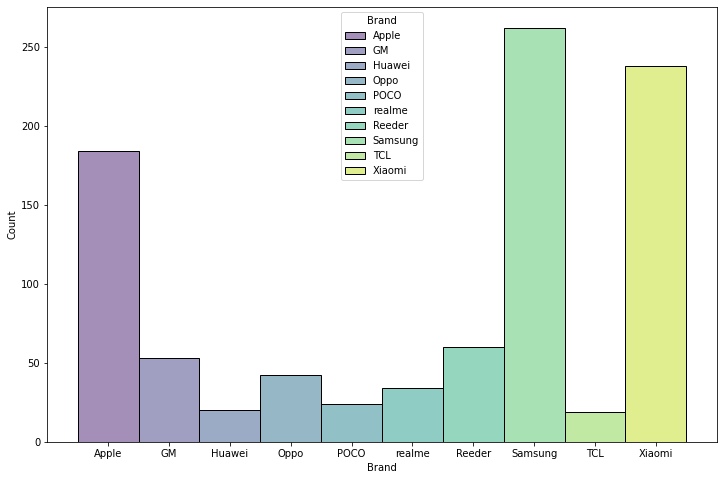

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(x = df.Brand, hue= df.Brand, palette = 'viridis')

<AxesSubplot:xlabel='Brand', ylabel='Screen Size'>

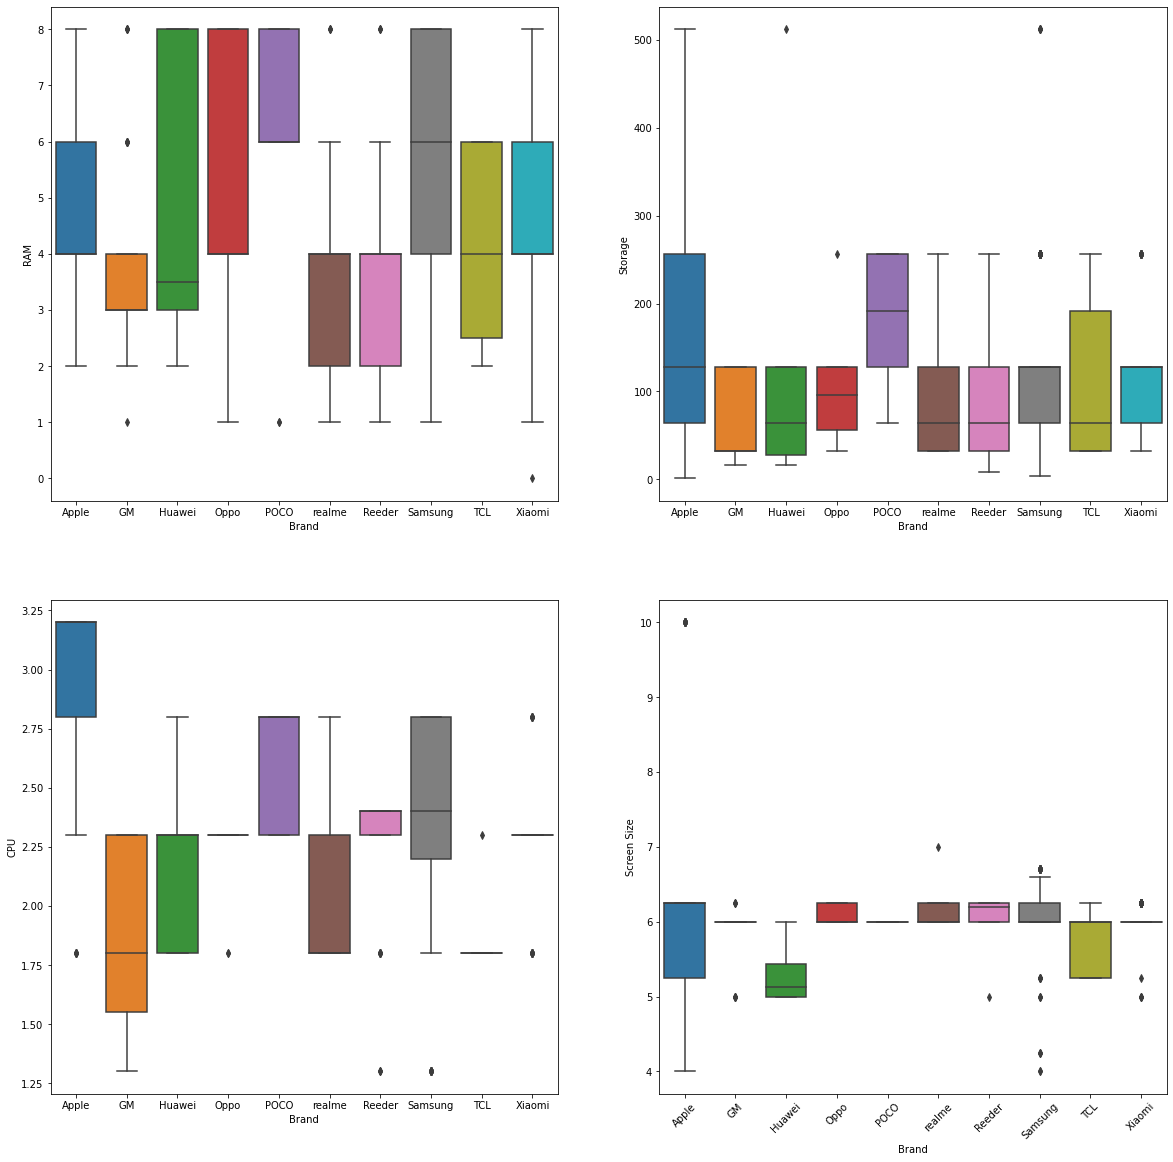

In [31]:
fig,ax1 = plt.subplots(2,2, figsize=(20,20))
plt.xticks(rotation=45)

sns.boxplot(data = df, y = df.RAM, x=df.Brand, ax = ax1[0,0])
sns.boxplot(data = df, y = df.Storage, x=df.Brand, ax = ax1[0,1])
sns.boxplot(data = df, y = df.CPU, x=df.Brand, ax = ax1[1,0])
sns.boxplot(data = df, y = df['Screen Size'], x=df.Brand, ax= ax1[1,1])

<Figure size 1440x432 with 0 Axes>

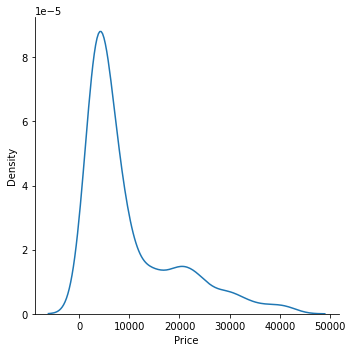

In [32]:
plt.figure(figsize=(20,6))
sns.displot(df.Price, kind = 'kde')

In [33]:
df[~(df.Brand == 'Apple')].Price.mean()

6431.352393617021

In [34]:
df[(df.Brand == 'Apple')].Price.mean()

23819.570652173912

<AxesSubplot:xlabel='Price', ylabel='Screen Size'>

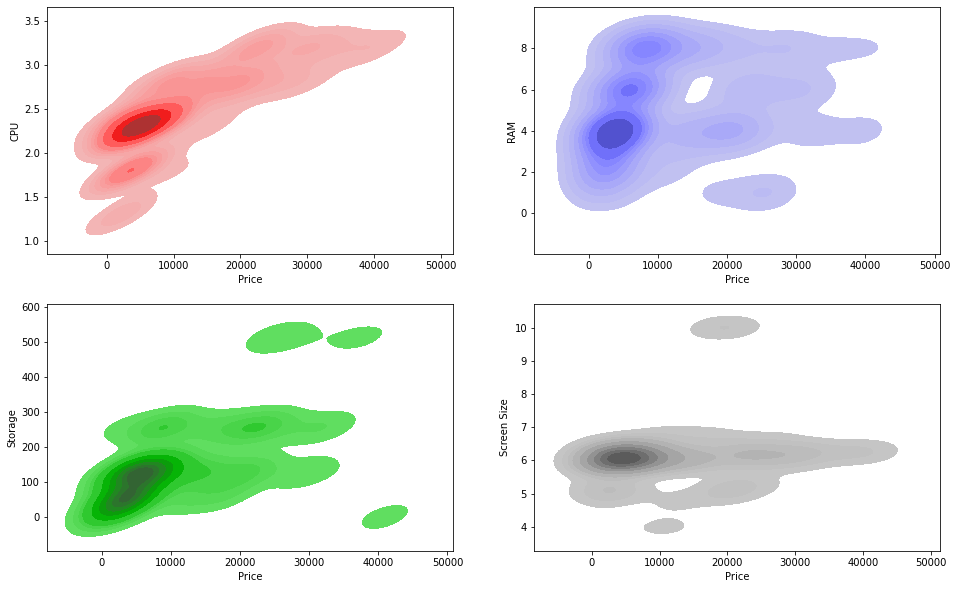

In [35]:
fig,ax1 = plt.subplots(2,2,figsize=(16,10))
sns.kdeplot(x=df.Price,y=df.CPU, shade = True, color='red',ax = ax1[0,0])
sns.kdeplot(x=df.Price,y=df.Storage, shade = True, color='green',ax = ax1[1,0])
sns.kdeplot(x=df.Price,y=df.RAM, shade = True, color='blue',ax = ax1[0,1])
sns.kdeplot(x=df.Price,y=df['Screen Size'], shade = True, color='gray',ax = ax1[1,1])



<AxesSubplot:xlabel='Price', ylabel='Screen Size'>

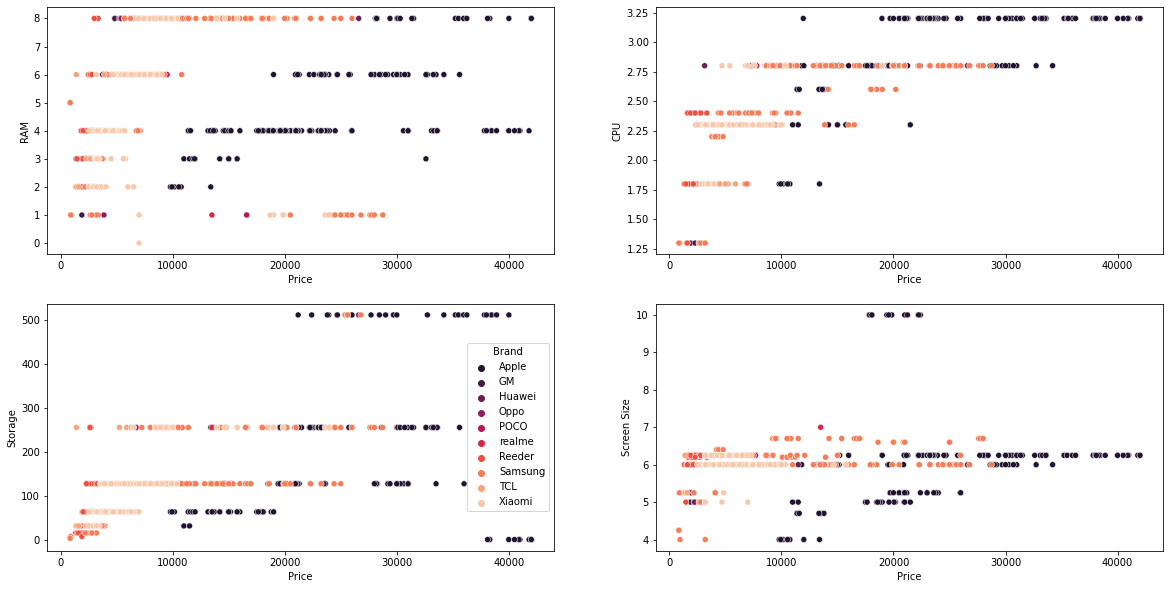

In [36]:
fig,ax1 = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x = df.Price, y = df.RAM, hue = df.Brand, palette = 'rocket', legend = None, ax = ax1[0,0] )
sns.scatterplot(x = df.Price, y = df.Storage, hue = df.Brand, palette = 'rocket', legend = True, ax = ax1[1,0] )
sns.scatterplot(x = df.Price, y = df.CPU, hue = df.Brand, palette = 'rocket', legend = None, ax = ax1[0,1] )
sns.scatterplot(x = df.Price, y = df['Screen Size'], hue = df.Brand, palette = 'rocket', legend = None, ax = ax1[1,1] )

In [37]:
df['Hardware'] = df.RAM * df.Storage * df.CPU * df['Screen Size'] 
df['Price/Hardware'] = df.Hardware / df.Price

In [38]:
df2=df.groupby('Brand').mean().sort_values('Price/Hardware', ascending=False)
df.groupby('Brand').mean().sort_values('Price/Hardware', ascending=False).style.background_gradient(axis=0, vmin=3000, vmax=15000, cmap="YlGnBu")


,Price,CPU,RAM,Storage,Camera Resolution,Screen Size,Hardware,Price/Hardware
Brand,,,,,,,,
POCO,8379.458333,2.600000,6.416667,189.333333,21.875000,6.000000,16194.560000,2.073430
Reeder,2205.550000,2.238462,3.847458,83.866667,12.666667,6.130909,4486.400000,1.865937
Oppo,4538.452381,2.244444,4.738095,91.200000,23.548387,6.098214,9430.044444,1.699071
TCL,3606.000000,1.850000,4.263158,104.421053,18.823529,5.781250,8029.440000,1.451657
Samsung,9147.290076,2.356769,5.561069,136.291188,28.935323,6.089320,12711.963246,1.312511
Xiaomi,6056.235294,2.288439,4.974684,114.188034,27.634715,6.027500,7508.311377,1.311573
GM,3018.188679,1.852632,3.886792,66.461538,12.921875,5.836538,3172.000000,0.956707
Apple,23819.570652,2.947826,4.842391,198.668478,11.897661,6.211364,19301.552727,0.756031
Huawei,5356.550000,2.188889,4.700000,93.600000,30.611111,5.312500,11009.828571,0.755792


<AxesSubplot:>

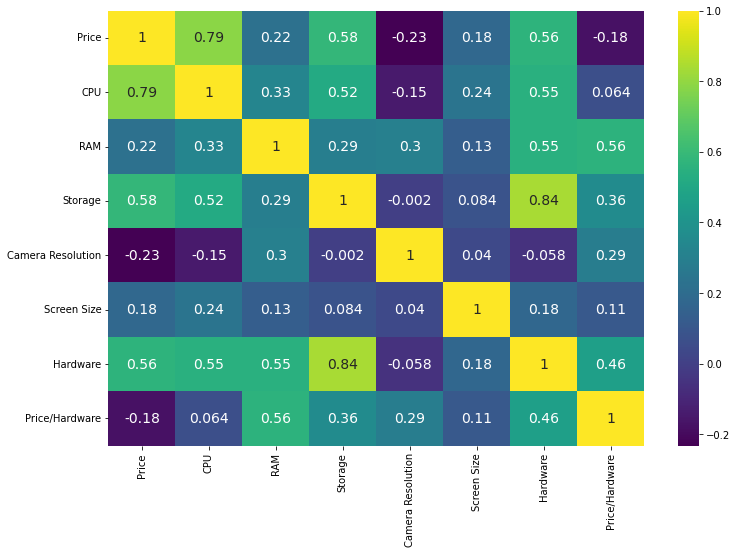

In [39]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap ='viridis',annot_kws={"size":14})

<AxesSubplot:xlabel='Price/Hardware', ylabel='Brand'>

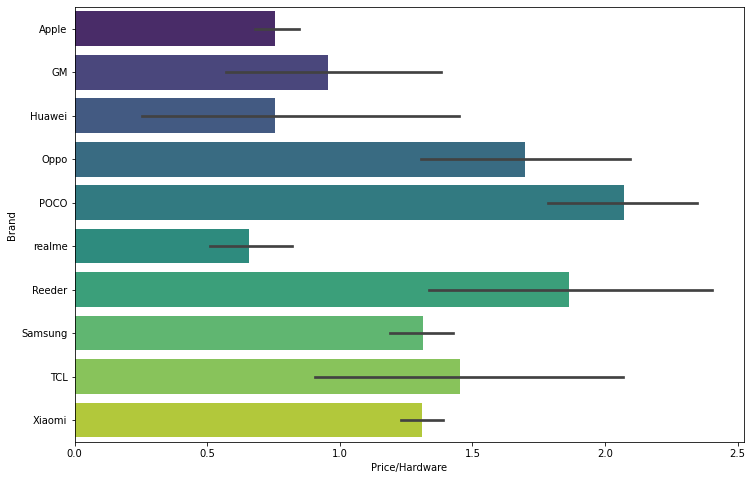

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(y=df.Brand, x= df['Price/Hardware'],palette='viridis')

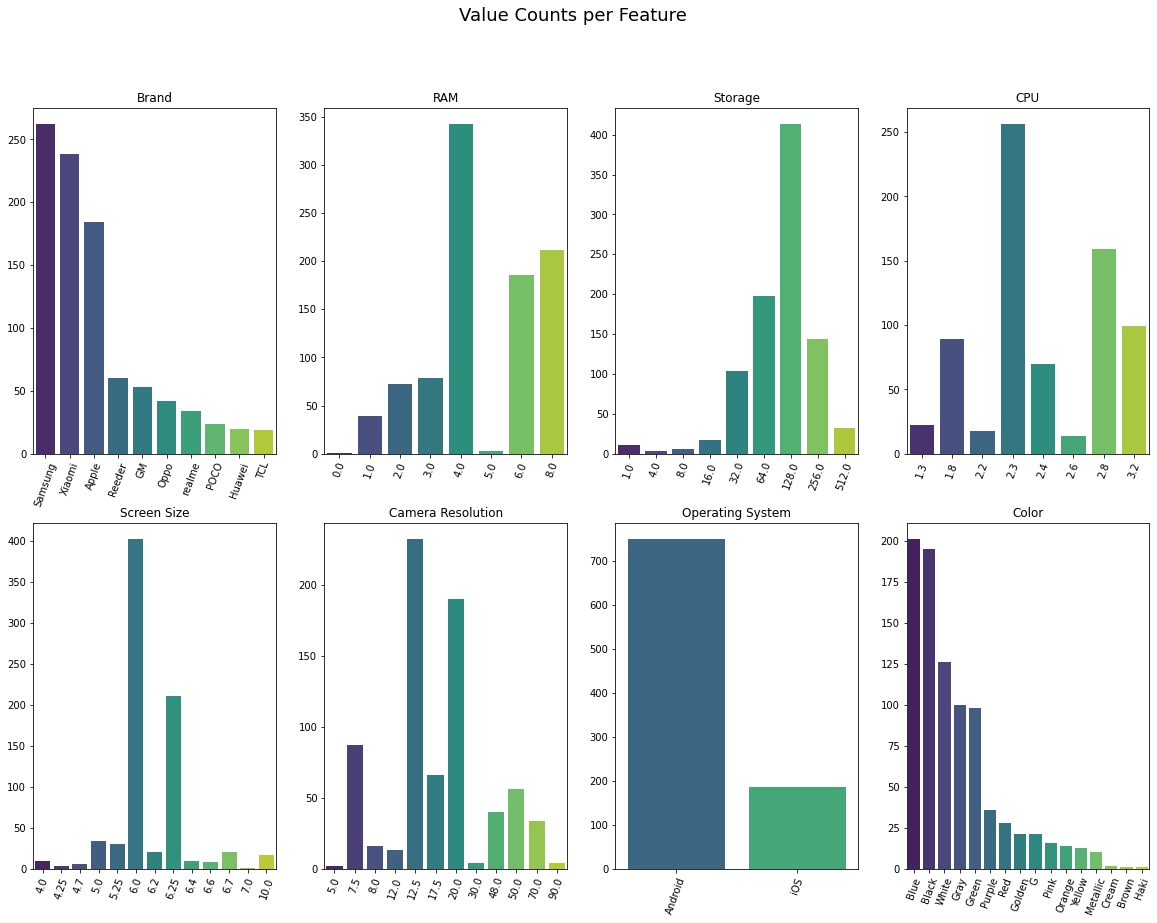

In [45]:
cols = ['Brand','RAM','Storage','CPU','Screen Size','Camera Resolution','Operating System','Color']


fig,ax1 = plt.subplots(2,4,figsize=(20,14))
fig.suptitle('Value Counts per Feature',size=18)

a = 0  
b = 0
for a in range(2):    
    for b in range(4):
            vcc = df[cols[a*4+b]].value_counts()
            sns.barplot(x=vcc.index,y=vcc.values,ax=ax1[a,b],palette='viridis')
            ax1[a,b].title.set_text(cols[a*4+b])
            plt.setp(ax1[a,b].xaxis.get_majorticklabels(), rotation=70)
plt.show()


          

count      936.000000
mean      9849.549145
std       9116.322332
min        849.000000
25%       3688.750000
50%       5699.000000
75%      13669.000000
max      41999.000000
Name: Price, dtype: float64